# Checklist

In [2]:
import pandas as pd

In [84]:
data = {'Section':['Section1', 'Q1', 'Q2', 'Q3',"Section2","Q1","Q2","Q3"],
        'Completion':["Completed","Completed","Completed","Completed","","Completed","Completed","Completed"],
        }

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
print(df)

    Section Completion
0  Section1  Completed
1        Q1  Completed
2        Q2  Completed
3        Q3  Completed
4  Section2           
5        Q1  Completed
6        Q2  Completed
7        Q3  Completed


In [4]:
from google.colab import files
uploaded=files.upload()

Saving WorkerFunnel.xlsx to WorkerFunnel.xlsx


# Section 1

## solution for question 1

In [5]:
funnel=pd.read_excel("WorkerFunnel.xlsx")
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN
...,...,...,...,...,...,...,...
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333
1193,2015-11-03 00:00:00,Q2,Finishing,0.70,960,8.0,NaN
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889


**After a thorough exploration about the dataset I got to know about the duplicate values present in the dataset,I identified that and took some proactive measures and steps to drop that duplicate values,as they were of no use.I kept the first occurence of the value and removed the 2nd respectively.This method surely helps to improve the efficiency**

In [6]:
funnel.drop_duplicates(inplace=True)


In [7]:
funnel
#the final dataframe(funnel) has been displayed without duplicate values values

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125
...,...,...,...,...,...,...,...
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333
1193,2015-11-03 00:00:00,Q2,Finishing,0.70,960,8.0,NaN
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889


**here i'm checking the null values present in the respective column**

In [8]:
funnel.isnull().sum()


Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64

In [9]:
funnel["Actual Productivity"].describe()

count    1131.000000
mean        0.732945
std         0.175379
min         0.233705
25%         0.650141
50%         0.758229
75%         0.850176
max         1.120437
Name: Actual Productivity, dtype: float64

**I noticed there were 30 null values in the Actual Productivity column out of the 1161 entries which eventually sums to 2.58% of missing values..which isn't too much;to handle these NaN values I replaced them with mode..which seemed to be the most practical solution to me as it wont mess up the data**.

In [10]:
funnel["Actual Productivity"].fillna(funnel["Actual Productivity"].mode()[0], inplace=True)

In [11]:
funnel.isnull().sum()
# the missing values are filled

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

In [12]:
funnel.shape

(1161, 7)

# solution for Q2

In [13]:
import numpy as np

here I have used the numpy library to compare the values of 2 columns and to get the result

In [14]:
funnel["Target Achieved"]=np.where(funnel["Actual Productivity"]>funnel["Targeted Productivity"],"Yes","No")


In [15]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,0.800402,Yes
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
...,...,...,...,...,...,...,...,...
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333,No
1193,2015-11-03 00:00:00,Q2,Finishing,0.70,960,8.0,0.800402,Yes
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625,No
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889,No


# Solution for Q2a

In [16]:
funnel["Target Achieved"].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
funnel["No. of Workers"].dtype

dtype('float64')

In [19]:
funnel["No. of Workers"].groupby(funnel["Quarter"]).sum()

Quarter
Q1    11938.5
Q2    10744.5
Q3     7449.0
Q4     8331.5
Q5     1373.0
Name: No. of Workers, dtype: float64


**The below graph represents the target achieved by workers over quarterly phases.The mean number of workers who were able to achieve the targets were slightly less than 38(estimation) but the one who were notb able to achive the target are nearly equal to 27.This graph helps us to understand that the no.of workers(who were able to achieve the target in quarterly phases)..this will surely help us to predict that what will be the best time (to hire workers) for the work to be completed with yes**

[Text(0.5, 1.0, 'Workers achieved target over quaterly phase')]

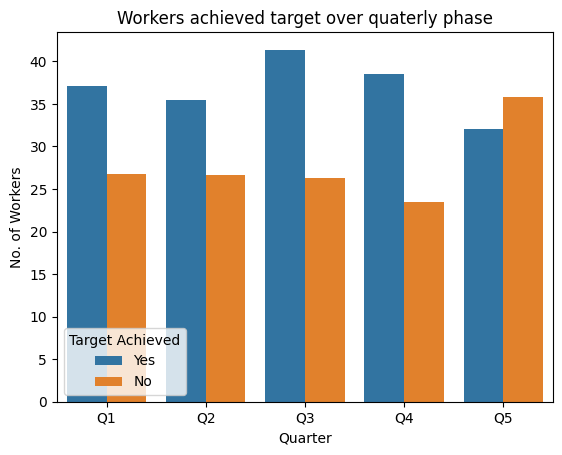

In [20]:
sns.barplot(data=funnel, x="Quarter", y="No. of Workers", hue="Target Achieved",estimator=np.mean,errorbar=("ci",0)).set(title="Workers achieved target over quaterly phase")

# Solution for Q2b

In [21]:
import statsmodels.api as sm

In [22]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,0.800402,Yes
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
...,...,...,...,...,...,...,...,...
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333,No
1193,2015-11-03 00:00:00,Q2,Finishing,0.70,960,8.0,0.800402,Yes
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625,No
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889,No


In [23]:
funnel['Date'] = pd.to_datetime(funnel['Date'])


In [24]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01,Q1,Sewing,0.80,1920,56.0,0.800402,Yes
5,2015-01-01,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
...,...,...,...,...,...,...,...,...
1192,2015-11-03,Q2,Finishing,0.75,960,8.0,0.628333,No
1193,2015-11-03,Q2,Finishing,0.70,960,8.0,0.800402,Yes
1194,2015-11-03,Q2,Finishing,0.65,960,8.0,0.625625,No
1195,2015-11-03,Q2,Finishing,0.75,1800,15.0,0.505889,No


<Axes: >

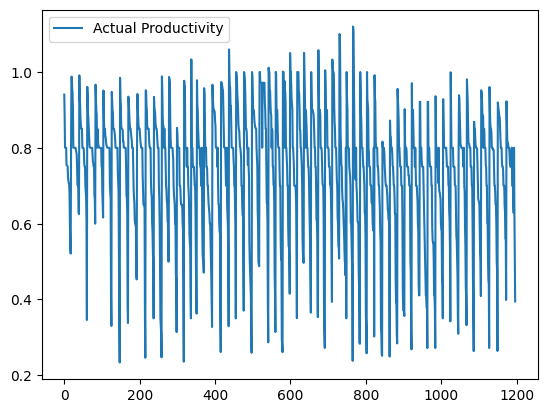

In [25]:
funnel[["Actual Productivity"]].plot()

# Check for stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller
def ad_test(funnel):
  dftest=adfuller(funnel,autolag="AIC")
  print("1. ADF ",dftest[0])
  print("2. P value ",dftest[1])
  print("3. Num of lags ",dftest[2])
  print("4. Num of observations used for ADF Regression and critical value calculation:  ",dftest[3])
  print("5. Critical Values: ")
  for key,val in dftest[4].items():
    print("\t",key,":",val)

In [27]:
ad_test(funnel["Actual Productivity"])

1. ADF  -4.141775151123371
2. P value  0.0008254848330088624
3. Num of lags  20
4. Num of observations used for ADF Regression and critical value calculation:   1140
5. Critical Values: 
	 1% : -3.4360991979671205
	 5% : -2.864078635828568
	 10% : -2.568121635118498


# The probability is less than 0.05 so we can conclude that the dataset is stationary

In [28]:
!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00


In [29]:
stepwise_fit=auto_arima(funnel["Actual Productivity"],trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1051.098, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1078.862, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1089.726, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1053.088, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1122.431, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1252.344, Time=2.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.55 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=1.81 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 35.897 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1161
Model:               SARIMAX(1, 1, 2)   Log Likelihood                 631.172
Date:                Sun, 17 Mar 2024   AIC                          -1252.344
Time:                        14:45:39   BIC                          -1227.063
Sample:                             0   HQIC                         -1242.805
                               - 1161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.979e-05      0.001     -0.116      0.907      -0.001       0.001
ar.L1          0.4435      0.064      6.932      0.000       0.318       0.569
ma.L1         -0.7579      0.070    -10.848      0.000      -0.895      -0.621
ma.L2         -0.1786      0.055     -3.260      0.001      -0.286      -0.071
sigma2         0.0197      0.001     27.154      0.000       0.018       0.021
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):              2378.04
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             1.74
Prob(H) (two-sided):                  0.13   Kurtosis:                         9.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

split data into training and testing

In [30]:
print(funnel.shape)

(1161, 8)


In [31]:
train=funnel.iloc[:-30]
test=funnel.iloc[-30:]
print(train.shape,test.shape)

(1131, 8) (30, 8)


In [32]:
!pip install statsmodels

import statsmodels.tsa.arima.model as sm_arima
from statsmodels.tsa.arima_model import ARIMA
model = sm_arima.ARIMA(train["Actual Productivity"], order=(1, 0, 5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Actual Productivity   No. Observations:                 1131
Model:                  ARIMA(1, 0, 5)   Log Likelihood                 635.487
Date:                 Sun, 17 Mar 2024   AIC                          -1254.975
Time:                         14:45:57   BIC                          -1214.728
Sample:                              0   HQIC                         -1239.770
                                - 1131                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7356      0.019     37.730      0.000       0.697       0.774
ar.L1         -0.0814      3.027     -0.027      0.979      -6.014       5.851
ma.L1          0.7122      3.030      0.235      0.814      -5.226       6.650
ma.L2          0.4401      1.914      0.230      0.818      -3.312       4.192
ma.L3          0.2424      1.186      0.204      0.838      -2.083       2.567
ma.L4          0.1187      0.638      0.186      0.852      -1.132       1.369
ma.L5          0.0309      0.285      0.109      0.914      -0.527       0.589
sigma2         0.0190      0.001     28.530      0.000       0.018       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2090.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             1.60
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ="levels")
print(pred)


1131    0.713554
1132    0.722734
1133    0.729055
1134    0.733459
1135    0.735384
1136    0.735628
1137    0.735608
1138    0.735610
1139    0.735610
1140    0.735610
1141    0.735610
1142    0.735610
1143    0.735610
1144    0.735610
1145    0.735610
1146    0.735610
1147    0.735610
1148    0.735610
1149    0.735610
1150    0.735610
1151    0.735610
1152    0.735610
1153    0.735610
1154    0.735610
1155    0.735610
1156    0.735610
1157    0.735610
1158    0.735610
1159    0.735610
1160    0.735610
Name: predicted_mean, dtype: float64


<Axes: >

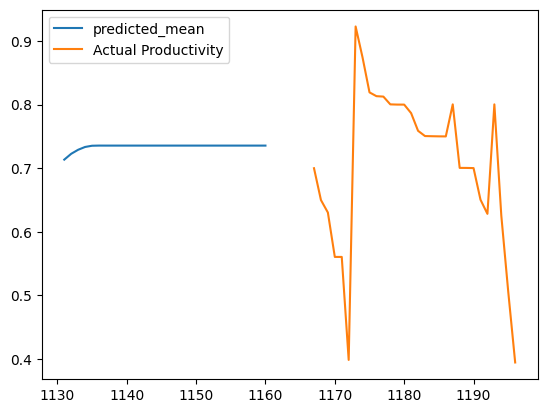

In [34]:
pred.plot(legend=True)
test["Actual Productivity"].plot(legend=True)

In [35]:
funnel["Actual Productivity"].mean()

0.7346881252454781

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test["Actual Productivity"]))
print(rmse)

0.1278938928623579


In [37]:
!pip install statsmodels
import statsmodels.tsa.arima.model as smt
model2 = smt.ARIMA(funnel["Actual Productivity"], order=(1, 0, 5))
model2 = model2.fit()
funnel.tail()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
1192,2015-11-03,Q2,Finishing,0.75,960,8.0,0.628333,No
1193,2015-11-03,Q2,Finishing,0.70,960,8.0,0.800402,Yes
1194,2015-11-03,Q2,Finishing,0.65,960,8.0,0.625625,No
1195,2015-11-03,Q2,Finishing,0.75,1800,15.0,0.505889,No
1196,2015-11-03,Q2,Finishing,0.70,720,6.0,0.394722,No


In [38]:
index_future_dates=pd.date_range(start="2015-11-03",end="2015-12-03")

pred=model2.predict(start=len(funnel),end=len(funnel)+30,typ="levels").rename("ARIMA Predictions")

pred.index = index_future_dates[:31]
print(pred)

2015-11-03    0.526462
2015-11-04    0.610704
2015-11-05    0.672812
2015-11-06    0.711095
2015-11-07    0.730439
2015-11-08    0.734843
2015-11-09    0.734511
2015-11-10    0.734536
2015-11-11    0.734534
2015-11-12    0.734534
2015-11-13    0.734534
2015-11-14    0.734534
2015-11-15    0.734534
2015-11-16    0.734534
2015-11-17    0.734534
2015-11-18    0.734534
2015-11-19    0.734534
2015-11-20    0.734534
2015-11-21    0.734534
2015-11-22    0.734534
2015-11-23    0.734534
2015-11-24    0.734534
2015-11-25    0.734534
2015-11-26    0.734534
2015-11-27    0.734534
2015-11-28    0.734534
2015-11-29    0.734534
2015-11-30    0.734534
2015-12-01    0.734534
2015-12-02    0.734534
2015-12-03    0.734534
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

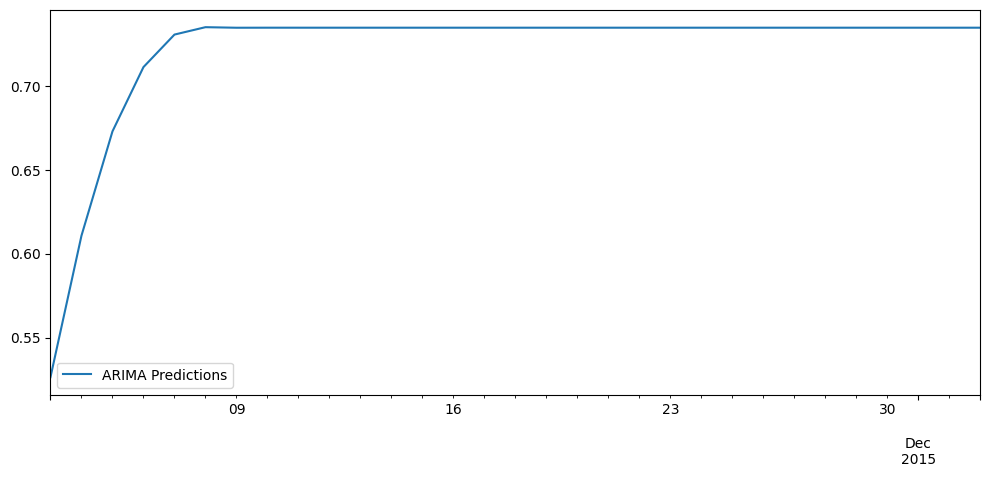

In [39]:
pred.plot(figsize=(12,5),legend=True)

# Rolling Averages

<Axes: xlabel='Date', ylabel='Actual Productivity'>

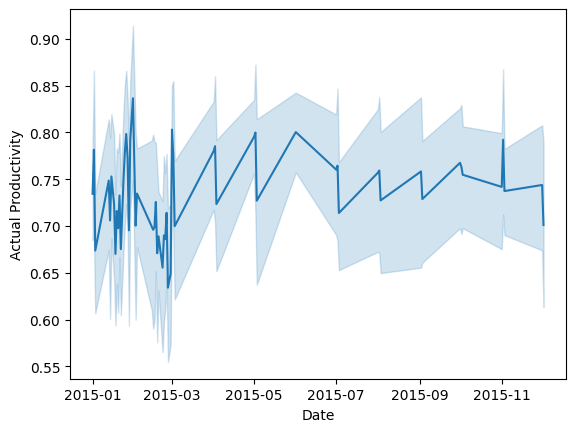

In [40]:
sns.lineplot(data=funnel,x="Date",y="Actual Productivity")

In [41]:
funnel["Rolling_30"]=funnel["Actual Productivity"].rolling(window=30,min_periods=1).mean()
funnel["Rolling_50"]=funnel["Actual Productivity"].rolling(window=50,min_periods=1).mean()
funnel["Rolling_100"]=funnel["Actual Productivity"].rolling(window=100,min_periods=1).mean()
funnel["Rolling_120"]=funnel["Actual Productivity"].rolling(window=120,min_periods=1).mean()

<Axes: xlabel='Date'>

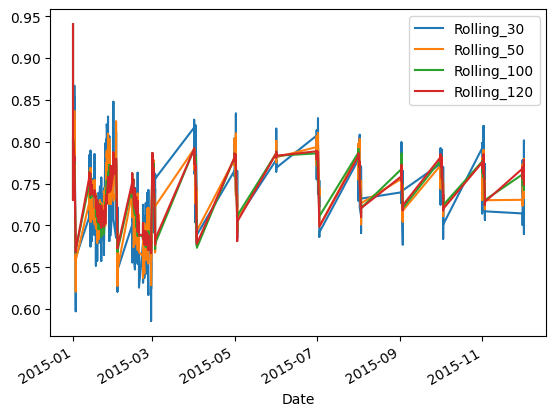

In [42]:
funnel.plot.line(x="Date",y=["Rolling_30","Rolling_50","Rolling_100","Rolling_120"],legend="auto")

# Q2c

In [43]:
funnel.columns

Index(['Date', 'Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity', 'Target Achieved',
       'Rolling_30', 'Rolling_50', 'Rolling_100', 'Rolling_120'],
      dtype='object')

In [44]:
X=funnel.iloc[:,0:1]
y=funnel.iloc[:,-1]

In [45]:
y

0       0.940725
1       0.913613
2       0.875932
4       0.857049
5       0.845665
          ...   
1192    0.733697
1193    0.732640
1194    0.730613
1195    0.728057
1196    0.724595
Name: Rolling_120, Length: 1161, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr=LinearRegression()

In [49]:
lr.fit(X_train,y_train)

LinearRegression()

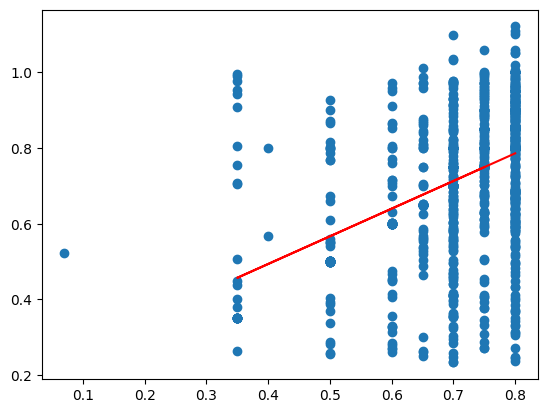

In [50]:
# Convert the 'Date' column to a string for compatibility with LinearRegression
funnel['Date'] = funnel['Date'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(funnel["Targeted Productivity"], funnel["Actual Productivity"], test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)

plt.scatter(funnel["Targeted Productivity"], funnel["Actual Productivity"])
plt.plot(X_train, lr.predict(X_train.values.reshape(-1, 1)), color="red")
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error

In [52]:
# Reshape X_test to a 2D array using numpy
X_test = np.array(X_test).reshape(-1, 1)

# Predict using the reshaped X_test
y_pred = lr.predict(X_test)

In [53]:
y_pred

array([0.78568803, 0.67615346, 0.74917651, 0.78568803, 0.63964193,
       0.71266498, 0.74917651, 0.71266498, 0.4570843 , 0.78568803,
       0.71266498, 0.71266498, 0.74917651, 0.71266498, 0.78568803,
       0.49359583, 0.63964193, 0.71266498, 0.71266498, 0.78568803,
       0.78568803, 0.71266498, 0.71266498, 0.56661888, 0.63964193,
       0.4570843 , 0.78568803, 0.74917651, 0.78568803, 0.78568803,
       0.78568803, 0.78568803, 0.74917651, 0.56661888, 0.71266498,
       0.71266498, 0.78568803, 0.78568803, 0.56661888, 0.78568803,
       0.78568803, 0.78568803, 0.78568803, 0.78568803, 0.78568803,
       0.78568803, 0.74917651, 0.78568803, 0.78568803, 0.78568803,
       0.78568803, 0.78568803, 0.78568803, 0.78568803, 0.78568803,
       0.74917651, 0.78568803, 0.63964193, 0.71266498, 0.56661888,
       0.78568803, 0.71266498, 0.63964193, 0.74917651, 0.71266498,
       0.56661888, 0.78568803, 0.78568803, 0.71266498, 0.78568803,
       0.67615346, 0.78568803, 0.78568803, 0.74917651, 0.78568

In [54]:
y_test.values

array([0.80040196, 0.65096228, 0.59114168, 0.80047051, 0.60098291,
       0.80056609, 0.87539062, 0.70054044, 0.26369382, 0.8000345 ,
       0.70051357, 0.70035455, 0.80590909, 0.80090961, 0.89172348,
       0.80040196, 0.60022419, 0.49654971, 0.70005833, 0.80040196,
       0.96105903, 0.70043672, 0.35325965, 0.50012336, 0.80040196,
       0.75548611, 1.10048392, 1.05962121, 0.80084242, 0.69018282,
       0.30750146, 0.9918    , 0.80040196, 0.76884722, 0.700422  ,
       0.53166667, 0.97186667, 0.80040196, 0.2565    , 0.80034377,
       0.90012976, 0.92564394, 0.60741667, 0.85695   , 0.24625   ,
       0.60765432, 0.76083333, 0.90012976, 0.58204546, 0.80024675,
       0.919125  , 0.80070175, 0.8001171 , 0.80080864, 0.96675926,
       0.763375  , 0.84506944, 0.950625  , 0.69998442, 0.50080172,
       0.85814394, 1.03357008, 0.35542803, 0.80040196, 0.9425    ,
       0.37046657, 0.85031268, 1.00001855, 0.70050893, 0.68106061,
       0.56825959, 0.9008    , 0.8319375 , 0.9520202 , 0.85052

# MAE

In [55]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.11977274377627958


# MSE

In [56]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.02795983328495559


# MAPE

In [57]:
print("MAPE",mean_absolute_percentage_error(y_test,y_pred))

MAPE 0.2120568113392035


# RMSE

In [58]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.16721194121520028


# R2 Score

In [59]:
print("RMSE",r2_score(y_test,y_pred))

RMSE 0.1356079153072881


# Section 2

# Q1

In [60]:
uploaded1=files.upload()

Saving ABTest.xlsx to ABTest.xlsx


In [61]:
abtest=pd.read_excel("ABTest.xlsx")
abtest

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control
...,...,...,...,...,...,...
18094,2023-05-17,Tablet,fyttlyf/personal/campaign/weekoneoffer-terms///,12,13,Control
18095,2023-05-17,Mobile,fyttlyf/personal//send-money-to-india///,4,15,Experiment
18096,2023-05-17,Laptop,fyttlyf/personal/buy/fyttlyf-benefits///,12,42,Control
18097,2023-05-17,Tablet,fyttlyf/enterprise/product/enterprise-pay-late...,15,13,Control


In [62]:
abtest.isnull().sum()

Date        0
Device      0
Address     0
Clicks      0
Visitors    0
Group       0
dtype: int64

In [63]:
abtest.columns

Index(['Date', 'Device', 'Address', 'Clicks', 'Visitors', 'Group'], dtype='object')

In [64]:
abtest.isnull().sum()
abtest.columns


Index(['Date', 'Device', 'Address', 'Clicks', 'Visitors', 'Group'], dtype='object')

In [65]:
abtest["Device"].value_counts()

Mobile    6330
Laptop    6181
Other     3687
Tablet    1901
Name: Device, dtype: int64

In [66]:
abtest["Device"].unique()

array(['Mobile', 'Laptop', 'Other', 'Tablet'], dtype=object)

In [67]:
abtest["Date"].unique()

array(['2023-05-18T00:00:00.000000000', '2023-05-19T00:00:00.000000000',
       '2023-05-20T00:00:00.000000000', '2023-05-21T00:00:00.000000000',
       '2023-05-22T00:00:00.000000000', '2023-05-23T00:00:00.000000000',
       '2023-05-24T00:00:00.000000000', '2023-05-07T00:00:00.000000000',
       '2023-05-08T00:00:00.000000000', '2023-05-09T00:00:00.000000000',
       '2023-05-10T00:00:00.000000000', '2023-05-11T00:00:00.000000000',
       '2023-05-12T00:00:00.000000000', '2023-05-13T00:00:00.000000000',
       '2023-05-14T00:00:00.000000000', '2023-05-15T00:00:00.000000000',
       '2023-05-16T00:00:00.000000000', '2023-05-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [68]:
clicks_by_device = abtest.groupby("Device")[["Clicks"]].sum()
print(clicks_by_device)

        Clicks
Device        
Laptop  449595
Mobile  628737
Other    40029
Tablet   14637


In [69]:
# Group the data by Date and Device
grouped_data = abtest.groupby(["Date", "Device"])["Clicks"].sum().reset_index()

# Create a pivot table with clicks as values and devices as columns
clicks_by_date_device = grouped_data.pivot(index="Date", columns="Device", values="Clicks")

# Print the clicks_by_date_device DataFrame
print(clicks_by_date_device)

Device      Laptop  Mobile  Other  Tablet
Date                                     
2023-05-07   23906   44029   2274     845
2023-05-08   24029   39919   2327     649
2023-05-09   23574   41024   2399    1101
2023-05-10   24586   23718   2280     759
2023-05-11   24187   22662   2107     847
2023-05-12   27495   48072   2346    1045
2023-05-13   27251   46357   2345     842
2023-05-14   27127   45886   2231     782
2023-05-15   26646   32722   2271     486
2023-05-16   25866   28999   2144     831
2023-05-17   22397   20770   2070     962
2023-05-18   17709   18576   2010    1197
2023-05-19   25756   45031   2176     643
2023-05-20   27465   43105   2381     890
2023-05-21   25443   33283   2077     686
2023-05-22   25167   32772   2108     613
2023-05-23   26882   37831   2303     781
2023-05-24   24109   23981   2180     678


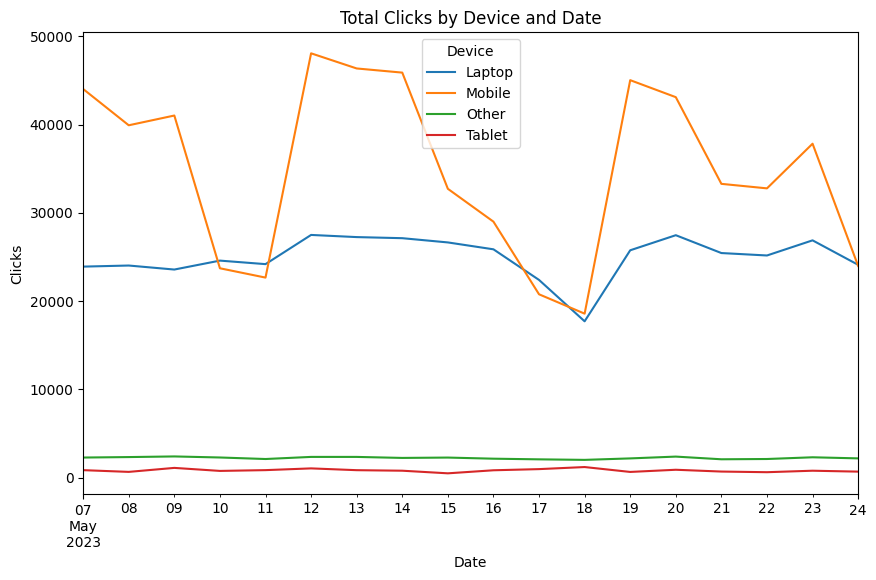

In [70]:
import matplotlib.pyplot as plt

# Plot the total clicks for each device over time
clicks_by_date_device.plot(kind="line", figsize=(10, 6))

# Add a title and labels
plt.title("Total Clicks by Device and Date")
plt.xlabel("Date")
plt.ylabel("Clicks")

# Show the plot
plt.show()

In [71]:
abtest.columns

Index(['Date', 'Device', 'Address', 'Clicks', 'Visitors', 'Group'], dtype='object')

In [74]:
import scipy.stats as stats

# Function to calculate click-through rate (CTR)
def calculate_ctr(clicks, visitors):
    return clicks / visitors

# Function to perform hypothesis test
def perform_hypothesis_test(control_clicks, control_visitors, exp_clicks, exp_visitors):
    # Calculate CTR for control and experimental groups
    control_ctr = calculate_ctr(control_clicks, control_visitors)
    exp_ctr = calculate_ctr(exp_clicks, exp_visitors)

    # Perform hypothesis test (two-sample t-test assuming equal variances)
    t_stat, p_value = stats.ttest_ind_from_stats(control_ctr, np.sqrt(control_ctr*(1-control_ctr)), control_visitors,
                                                 exp_ctr, np.sqrt(exp_ctr*(1-exp_ctr)), exp_visitors,
                                                 equal_var=True)

    return t_stat, p_value

# Function to calculate required sample size
def calculate_sample_size(MDE, alpha, power, control_ctr, exp_ctr):
    pooled_var = (control_ctr * (1 - control_ctr) + exp_ctr * (1 - exp_ctr)) / 2
    Z_alpha_2 = stats.norm.ppf(1 - alpha/2)
    Z_beta = stats.norm.ppf(power)
    sample_size = (2 * pooled_var * (Z_alpha_2 + Z_beta)**2) / MDE**2
    return sample_size



control_clicks = 100
control_visitors = 1000
exp_clicks = 120
exp_visitors = 1000
MDE = 0.05
alpha = 0.05
power = 0.80

# hypothesis test
t_stat, p_value = perform_hypothesis_test(control_clicks, control_visitors, exp_clicks, exp_visitors)

# Calculate required sample size
control_ctr = calculate_ctr(control_clicks, control_visitors)
exp_ctr = calculate_ctr(exp_clicks, exp_visitors)
required_sample_size = calculate_sample_size(MDE, alpha, power, control_ctr, exp_ctr)

# Check if actual sample size is sufficient
actual_sample_size = control_visitors + exp_visitors
is_sufficient_sample = "Yes" if actual_sample_size >= required_sample_size else "No"

# Output results
print("Hypothesis Test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)
print("\nRequired Sample Size:", required_sample_size)
print("Actual Sample Size:", actual_sample_size)
print("Sufficient Sample Size to conclude the test?", is_sufficient_sample)


Hypothesis Test Results:
T-statistic: -1.4300313895335033
P-value: 0.1528643616741568

Required Sample Size: 614.0963504154726
Actual Sample Size: 2000
Sufficient Sample Size to conclude the test? Yes


# Q3

In [78]:
import scipy.stats as stats

def test_hypothesis(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
  """
  This function is designed to assess whether the treatment group's conversion rate is higher than that of the control group.
   It takes inputs such as the number of visitors and conversions for both groups, along with a desired confidence level for the statistical test.

It then compares the conversion rates of both groups and determines which one is better based on the specified confidence level.
If the treatment group's conversion rate is statistically significantly higher, it returns "Experiment Group is Better."
 If the control group's conversion rate is significantly higher, it returns "Control Group is Better."
  If there's not enough evidence to determine a significant difference, it returns "Indeterminate."
  """

  # Calculate the conversion rates for each group.
  control_rate = control_conversions / control_visitors
  treatment_rate = treatment_conversions / treatment_visitors

  # Calculate the z-score for the difference in conversion rates.
  z_score = (treatment_rate - control_rate) / (
      (control_rate * (1 - control_rate) / control_visitors + treatment_rate * (1 - treatment_rate) / treatment_visitors)**0.5)

  # Determine the critical value based on the desired confidence level.
  if confidence_level == 90:
    critical_value = 1.645
  elif confidence_level == 95:
    critical_value = 1.96
  elif confidence_level == 99:
    critical_value = 2.576
  else:
    raise ValueError("Invalid confidence level.")

  # Compare the z-score to the critical value.
  if z_score > critical_value:
    return "Experiment Group is Better"
  elif z_score < -critical_value:
    return "Control Group is Better"
  else:
    return "Indeterminate"

In [79]:
result = test_hypothesis(1000, 50, 1000, 70, 95)
print(result)

Indeterminate


# Q4

In [85]:
!pip install streamlit
import streamlit as st

In [87]:
import streamlit as st

def perform_hypothesis_test(sample_size, mean, standard_deviation, alpha):
  """
This function conducts a hypothesis test and calculates the p-value based on the provided sample size,
sample mean, sample standard deviation, and significance level (alpha).
The p-value indicates the probability of observing the data or more extreme results under the assumption that the null hypothesis is true.
 The lower the p-value, the stronger the evidence against the null hypothesis.
  """
  from scipy.stats import ztest
  return ztest(sample_size, mean, standard_deviation, value=0, alternative="two-sided")[1]

st.title("Hypothesis Test App")

# Get user input
sample_size = st.number_input("Enter the sample size:")
mean = st.number_input("Enter the sample mean:")
standard_deviation = st.number_input("Enter the sample standard deviation:")
alpha = st.number_input("Enter the significance level (alpha):")

# Perform the hypothesis test and display the result
if st.button("Perform Hypothesis Test"):
  p_value = perform_hypothesis_test(sample_size, mean, standard_deviation, alpha)
  st.write("The p-value is:", p_value)
  if p_value < alpha:
    st.write("Reject the null hypothesis.")
  else:
    st.write("Fail to reject the null hypothesis.")